In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [88]:
csv = pd.read_csv('temp_calibration_results_2.csv')

In [89]:
def get_mean_std(csv: pd.DataFrame):
    """
    """
    # filter out error rows
    df_filtered = csv[csv['measured temperature'] != -127.0]
    df_filtered = df_filtered[df_filtered['measured temperature'] != 85.0]
    
    # group by - get mean and std
    df = df_filtered.groupby(['set temp', 'marker position']).agg({'measured temperature': ['mean', 'std']})
    df = df.xs('measured temperature', axis=1, drop_level=True)
    df = df.reset_index()
    
    return df
    
df = get_mean_std(csv)

50
60
70
80
90


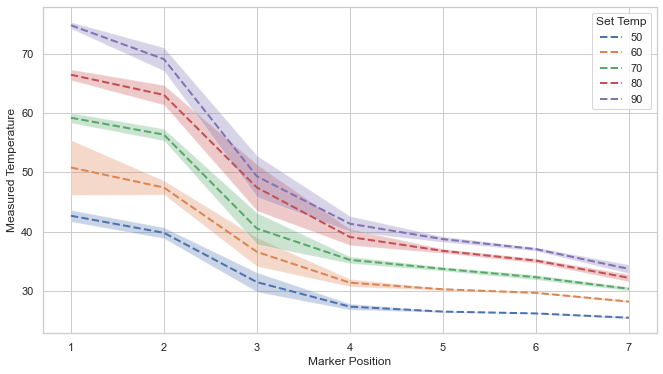

In [90]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set_style("whitegrid", {'axes.grid' : True})



for temperature in df['set temp'].unique():
    print(temperature)
    tmp_df = df.query(f'`set temp` == {temperature} & `marker position` > 0')
    tmp_arr = tmp_df.to_numpy()
    # parse values
    position = tmp_arr[:,1]
    mean = tmp_arr[:,2]
    std = tmp_arr[:,3]
    # plot
    plt.plot(position, mean, '--', label=f'{temperature}', linewidth=2)
    plt.fill_between(position, mean - std, mean + std, alpha=0.3)
    
plt.legend(title='Set Temp')
plt.ylabel("Measured Temperature")
plt.xlabel("Marker Position")
plt.show()

intercept: 0.22106666666670094
slope: 0.7617799999999996


Text(0.5, 0, 'Measured Temperature')

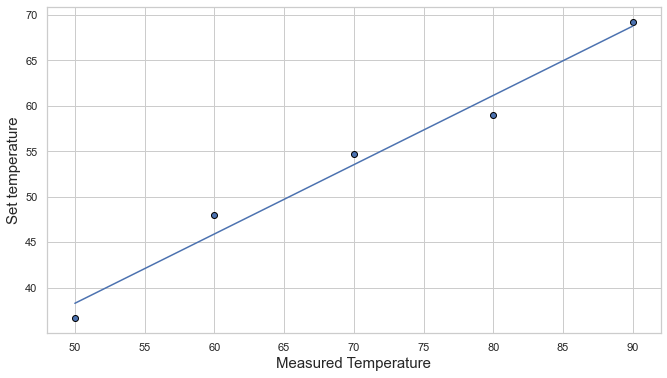

In [91]:
# look into correlation between temp sensor and top sensor

tmp_df = df.query(f'`marker position` == 0')

set_temps = tmp_df['set temp'].to_numpy()
measured_temps = tmp_df['mean'].to_numpy()

regressor = LinearRegression()
regressor.fit(set_temps.reshape(-1, 1), measured_temps)
print(f"intercept: {regressor.intercept_}")
print(f"slope: {regressor.coef_[0]}")

# plot
plt.scatter(set_temps, measured_temps, edgecolor='black')
plt.plot(set_temps, regressor.coef_[0]*set_temps+regressor.intercept_)
plt.ylabel("Set temperature", size=15)
plt.xlabel("Measured Temperature", size=15)

intercept: 3.2002964828485005
slope: 0.7420107234042549


Text(0.5, 0, 'Measured Temperature')

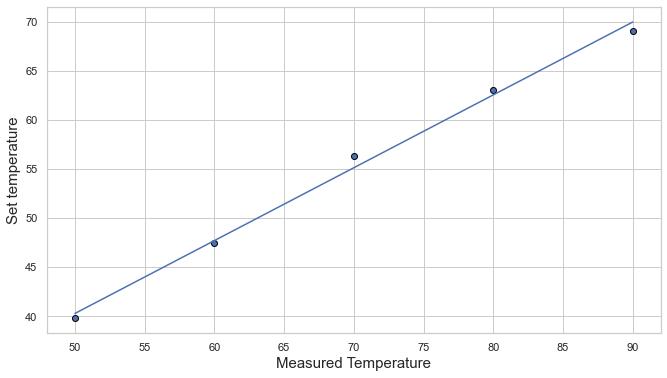

In [92]:
# look into correlation between temp sensor and heated area

tmp_df = df.query(f'`marker position` == 0')
tmp_df2 = df.query(f'`marker position` == 2')

set_temps = tmp_df['set temp'].to_numpy()
measured_temps = tmp_df2['mean'].to_numpy()

regressor = LinearRegression()
regressor.fit(set_temps.reshape(-1, 1), measured_temps)
print(f"intercept: {regressor.intercept_}")
print(f"slope: {regressor.coef_[0]}")

# plot
#sns.histplot(data=csv.query(f'`marker position` == 2'), x='measured temperature')
#sns.violinplot(data=csv.query(f'`marker position` == 2'), x='set temp', y='measured temperature')

plt.scatter(set_temps, measured_temps, edgecolor='black')
plt.plot(set_temps, regressor.coef_[0]*set_temps+regressor.intercept_)
plt.ylabel("Set temperature", size=15)
plt.xlabel("Measured Temperature", size=15)